## **Dataset: Wholesale Customers Data**  
- **Manba:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  
- **Hajmi:** **22 KB**
- **Format:** CSV  
- **Tavsif:** bu dataset **ulgurji savdo mijozlarini** xarajatlar bo‘yicha klasterlash uchun ishlatiladi.  
  U quyidagi xarajat kategoriyalarini o‘z ichiga oladi:  
  - **channel** (mijoz turi: 1 – HoReCa (mehmonxona, restoran, kafelar) yoki 2 – chakana savdo)  
  - **region** (hudud: 1 – Lisbon, 2 – Oporto, 3 – boshqa)  
  - **fresh** (yangi mahsulotlarga sarf qilingan summa)  
  - **milk** (sut mahsulotlariga sarf qilingan summa)  
  - **grocery** (oziq-ovqat mahsulotlariga sarf qilingan summa)  
  - **frozen** (muzlatilgan mahsulotlarga sarf qilingan summa)  
  - **Detergents_Paper** (kimyoviy tozalash va qog‘oz mahsulotlari)  
  - **delicassen** (delikates mahsulotlar)  

---

### **Vazifa: mijozlarni xarajat turlariga qarab segmentlash**  
Maqsad – **mijozlarni xarajat qiladigan mahsulotlar bo‘yicha klasterlash va marketologlarga tavsiyalar berish**  

---

### **Klasterlash bosqichlari**  
1) **Maʼlumotlarni tayyorlash**  
   - `Channel` va `Region` ustunlarini olib tashlang yoki kodlang.  
   - Har bir xarajat ustunini **normalizatsiya qiling**.  

2) **K-means klasterlashni amalga oshirish**  
   - K-means yordamida mijozlarni **xarajat qilish odatlari** bo‘yicha segmentlarga ajrating.  

3) **Natijalarni vizualizatsiya qilish**  
   - **Pairplot yoki scatter plot** yordamida klasterlarni ko‘rsating.  
   - Har bir segmentning xarajatlar bo‘yicha o‘rtacha qiymatini diagrammada aks ettiring.

---

###*** ESLATMA**: *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Malumotlarga ishlov berish

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Ko'rinib turibdiki malumotlarimiz ichida hech qanday `NAN` qiymatlar mavjud emas ekan endi `Channel` va `Region` ustunlaridan tashqari boshqa boshqa ustunlarni `Normalizatsiya` qilsak ham bo'ladi**

### Normalizatsiya

In [6]:
X = df.values[:, 2:]
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

### KMeans

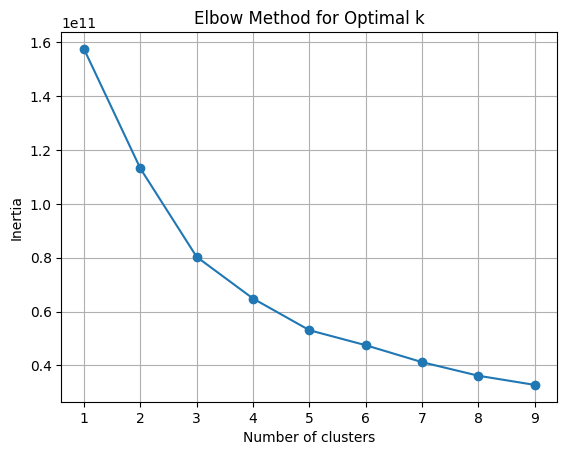

In [7]:
from os import initgroups
# Tirsak nuqtani topish
inertias = []
for k in range(1,10):
  kmeans = KMeans(init="k-means++", n_clusters=k, n_init=15)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 10), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [10]:
!pip install kneed

In [11]:
# Avtomatik elbowni aniqlash
from kneed import KneeLocator

kneedle = KneeLocator(range(1, 10), inertias, curve='convex', direction='decreasing')
print("Optimal number of clusters (elbow):", kneedle.knee)


Optimal number of clusters (elbow): 3


In [13]:
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=15)
kmeans.fit(X)
print(kmeans.labels_)

[0 0 0 0 2 0 0 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 1 2 0 0 0 1 2 0 0 0 2 0 0 2
 0 1 2 2 0 0 1 0 1 1 1 0 1 0 0 2 0 2 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 2 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0
 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 2 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 2 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 2
 2 0 0 2 0 0 1 1 0 1 0 0 0 0 2 0 0 2 0 0 0 0 0 2 2 2 2 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 2 1 0 0 0 0 0 0 1 0 0 0 0 2 2 0 0 0 0 0 1 0
 1 0 2 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 2 0 0 2 0 2 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2 0 0 2
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 0]


In [15]:
df['cluster'] = kmeans.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


In [29]:
grouped_clusters = df.groupby('cluster').mean()
grouped_clusters

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.260606,2.554545,8253.469697,3824.60303,5280.454545,2572.660606,1773.057576,1137.496970
1,1.960000,2.440000,8000.040000,18511.42000,27573.900000,1996.680000,12407.360000,2252.020000
2,1.133333,2.566667,35941.400000,6044.45000,6288.616667,6713.966667,1039.666667,3049.466667


In [28]:
print(df['Channel'].value_counts())
print(df['Region'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64


**Qisqacha xulosa**:

1 – HoReCa (mehmonxona, restoran, kafelar) orqali harajat qilgan mijozlarga qaraydigan bo'lsak ko'pchilik mahsulotlardan kamroq xarid qilishgan va aksincha 2 – chakana savdo orqali xarid qilganlari esa ko'roq xarajat ailishgan ekan.
Hamma hududdagi mijozlar xaridlarni ikkala usul orqali ham deyarli birday xarajat qilishgan ekan. Sut mahsulotlari(Milk), Oziq-ovqat mahsulotlari(Grocery) va Kimyoviy tozalash va qog‘oz mahsulotlariga  (Detergents_Paper) 1-usul (HoReCa) bilan xarajat qilganlarga nisbatan ko'roq pul sarflagan ekan





### Visualization

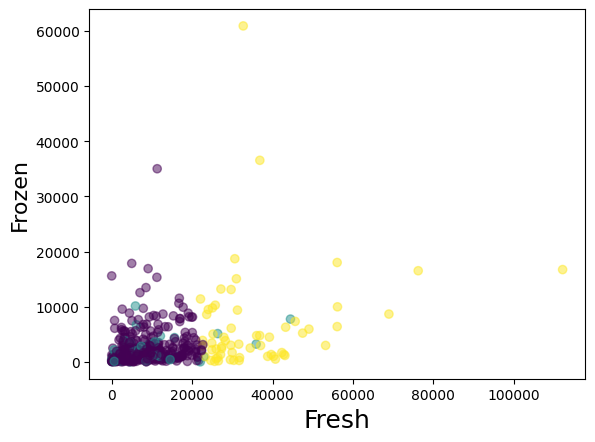

In [27]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3],c=kmeans.labels_.astype(float), alpha=0.5)
plt.xlabel('Fresh', fontsize=18)
plt.ylabel('Frozen', fontsize=16)
plt.show()

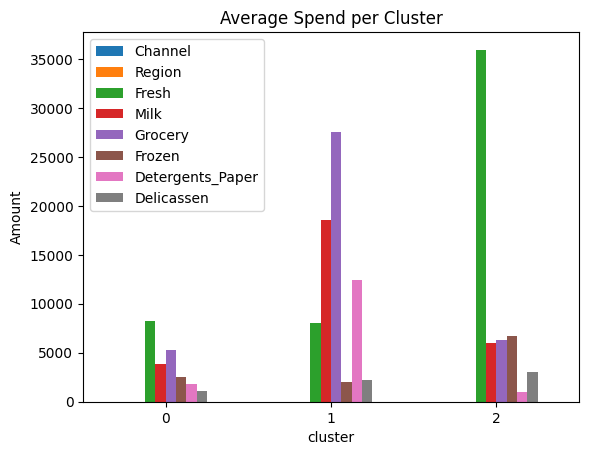

In [32]:
grouped_clusters.plot(kind="bar")
plt.title('Average Spend per Cluster')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

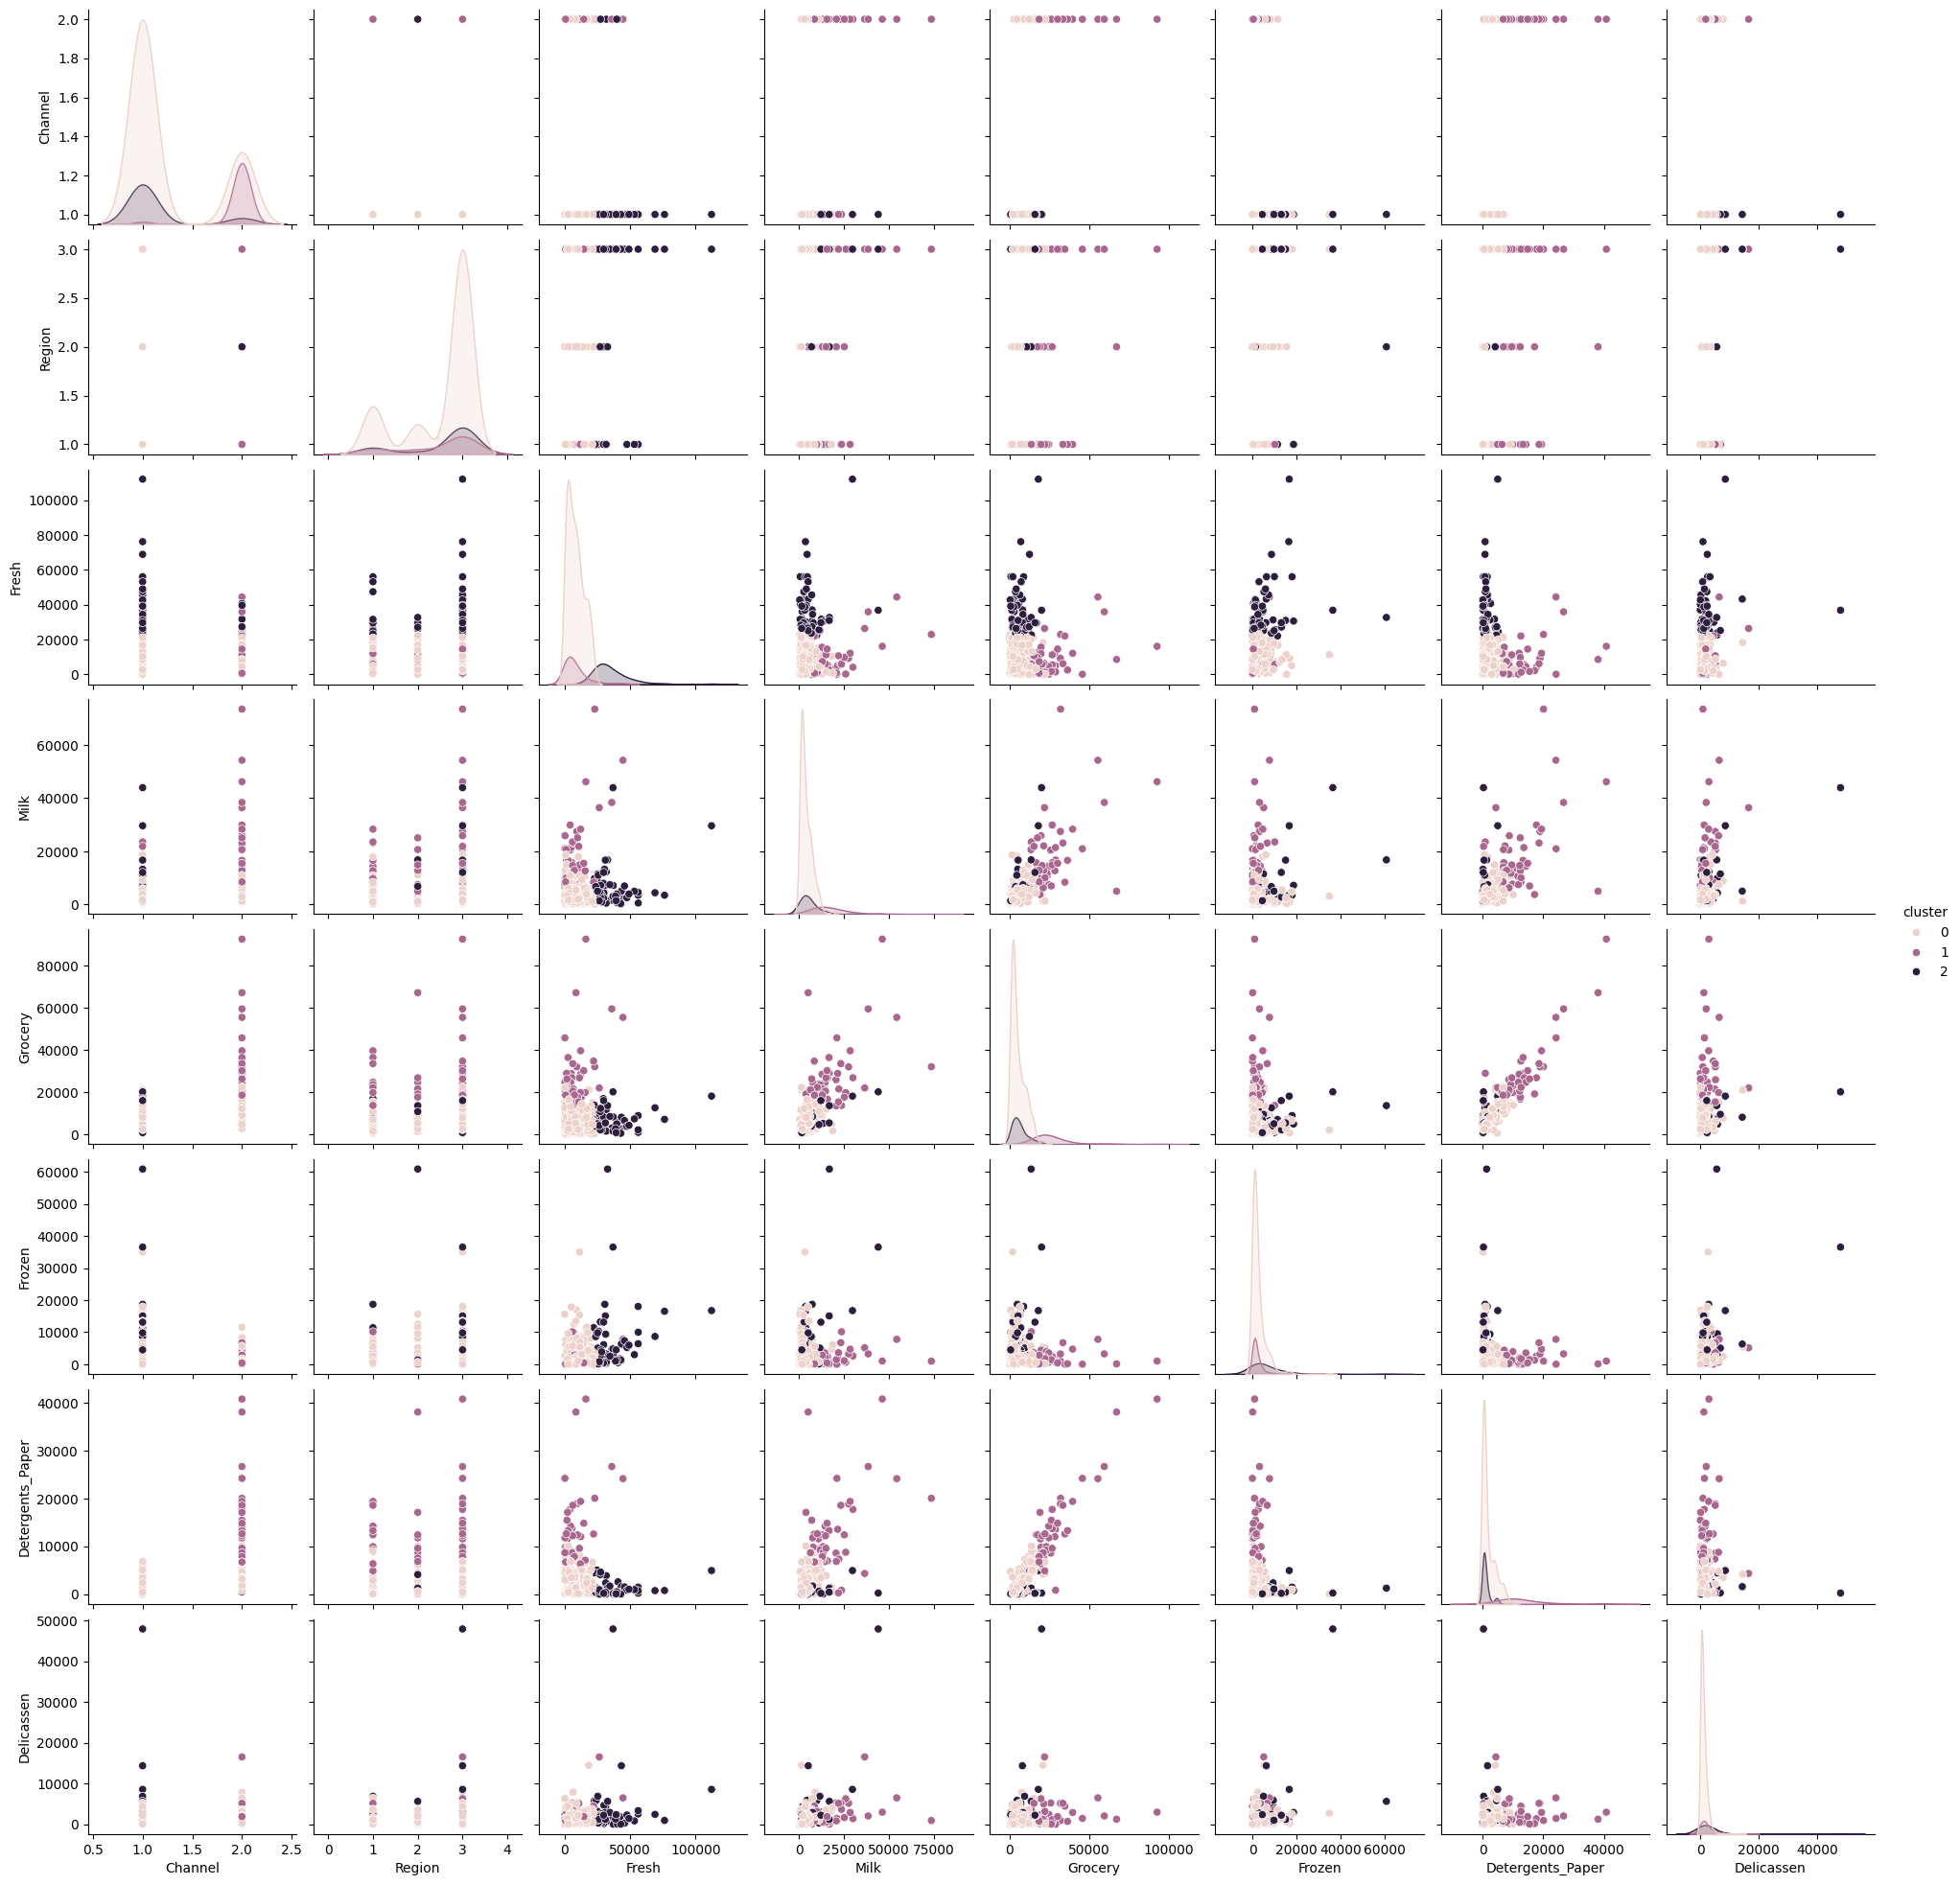

In [20]:
# pairplot
sns.pairplot(df, hue="cluster")
plt.show()